In [ ]:
from adding_clusters import *


full_dataset_pathname = "/Volumes/Jake_ssd/Paper 2/New_Crack_Len_FULL_OG_dataframe_2024_02_22.csv"
data = pd.read_csv(full_dataset_pathname, index_col=0)


In [ ]:

cluster_ts = ['init_cluster', 'both', 'impact_cluster']
# cluster_ts = ['init_cluster']

for cluster_t in cluster_ts:
    for num_clusterz in range(3, 10, 2):
        if(cluster_t == 'both'):
            data_with_clusters = add_cluster_one_hot_vectors(data, num_clusters=num_clusterz, cluster_type='init_cluster')
            data_with_clusters = add_cluster_one_hot_vectors(data_with_clusters, num_clusters=num_clusterz, cluster_type='impact_cluster')
        else:
            data_with_clusters = add_cluster_one_hot_vectors(data, num_clusters=num_clusterz, cluster_type=cluster_t)
        labels_to_predict, model_types, backward_feat_selection_results_folder, all_features, data_folder, model_folder, results_folder, hyperparam_folder, Paper2_path = make_datasets(cluster_t, num_clusterz, data_with_clusters)
        all_features_to_keep = get_features_to_keep(labels_to_predict, model_types, full_dataset_pathname, backward_feat_selection_results_folder, all_features)
        make_all_models(model_types, labels_to_predict, data_folder, model_folder, results_folder, all_features_to_keep, hyperparam_folder)
        evaluate_models(model_types, labels_to_predict, model_folder, results_folder, Paper2_path, all_features_to_keep)



init_cluster
3
0.2022900809396956


init_cluster
5
0.2082674985399318


init_cluster
7
0.1998922860617907


init_cluster
9
0.1998764305080156


both
3
0.1916120932866244


both
5
0.2246890965727745


both
7
0.2017960873151698


both
9
0.2020567924630939


impact_cluster
3
0.1930078282847825


impact_cluster
5
0.2666599236545799


impact_cluster
7
0.2205494856446902


impact_cluster
9
0.1963381395652049


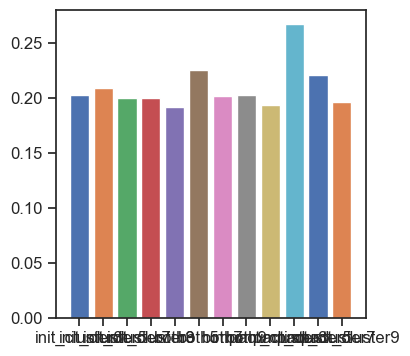

In [7]:
cluster_ts = ['init_cluster', 'both', 'impact_cluster']
# cluster_ts = ['init_cluster']

for cluster_t in cluster_ts:
    for num_clusterz in range(3, 10, 2):
        results_df = pd.read_csv(f'/Volumes/Jake_ssd/with_clusters/{cluster_t}_{num_clusterz}_clusters/Compare_Code_5_fold_ensemble_results/height/Single RF/1_models/height_Single RF_1results.csv')
        print('\n')
        print(cluster_t)
        print(num_clusterz)
        print(results_df.iloc[5]['test R2'])
        plt.bar(str(cluster_t)+ str(num_clusterz) , results_df.iloc[5]['test R2'])

plt.show()